In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive
'BIKE DETAILS.csv'
'Colab Notebooks'
'Copy of Creating a knowledge quiz.gsheet'
 Data_Sceince_Project_Cleaning_Spain_Weather_Data.ipynb
'data science .gdoc'
'DTSC 2301-2302'
 energy_dataset.csv
'Final Paper UNCC DATA SCIENCE - Group 6.docx'
'global goal .gdoc'
'Group Project 3 - Project Report Template Summer (1).xlsx'
 Handle_Dates_and_Split_by_Index.ipynb
 house_value.csv
 IMG_9913.png
'Interim Paper.gdoc'
 InterimProject
 InterimProject.txt
 Intro_to_Notebooks.ipynb
 medical_insurance.csv
'Mental Health Questionnaire (Responses).gsheet'
 nov27_dtsc_individualmastery.ipynb
'Project 1 - STAT.gsheet'
'Project 2.gsheet'
'Project 2 Report - Template.xlsx'
'Project 3 .gsheet'
'Project Report Template (1).gsheet'
'Project Report Template (2).xlsx'
'Project Report Template.gsheet'
'Project Report Template.xlsx'
'Scholarly Article Prep.doc

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
energy_dataset = pd.read_csv("energy_dataset.csv")
energy_dataset

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


In [ ]:
#@title cleaned data set
noNaNEnergy_dataset = energy_dataset.fillna(0)
newEnergy_Dataset = noNaNEnergy_dataset.drop(columns=['generation fossil coal-derived gas', 'generation fossil oil shale','generation fossil peat','generation geothermal','generation marine', 'generation wind offshore','forecast wind offshore eday ahead', 'generation hydro pumped storage aggregated'])
newEnergy_Dataset

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,...,95.0,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,...,95.0,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,...,94.0,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,...,93.0,31.0,287.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93,69.89


In [ ]:
renewable_dataset = newEnergy_Dataset.drop(columns=['generation fossil gas','generation fossil hard coal', 'generation fossil oil','generation other', 'generation fossil brown coal/lignite', 'forecast solar day ahead', 'forecast wind onshore day ahead','total load forecast','total load actual','price day ahead','price actual', 'time', 'generation nuclear'])
renewable_dataset.head()

,generation biomass,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation other renewable,generation solar,generation waste,generation wind onshore
0,447.0,863.0,1051.0,1899.0,73.0,49.0,196.0,6378.0
1,449.0,920.0,1009.0,1658.0,71.0,50.0,195.0,5890.0
2,448.0,1164.0,973.0,1371.0,73.0,50.0,196.0,5461.0
3,438.0,1503.0,949.0,779.0,75.0,50.0,191.0,5238.0
4,428.0,1826.0,953.0,720.0,74.0,42.0,189.0,4935.0


In [ ]:
non_renewable_dataset = newEnergy_Dataset.drop(columns=['time',
                                                        'generation biomass',
                                                        'generation solar',
                                                        'generation waste',
                                                        'generation hydro run-of-river and poundage',
                                                        'generation hydro water reservoir',
                                                        'generation wind onshore',
                                                        'generation other renewable',
                                                        'generation hydro pumped storage consumption',
                                                        'forecast solar day ahead',
                                                        'forecast wind onshore day ahead',
                                                        'total load forecast',
                                                        'total load actual',
                                                        'price day ahead',
                                                        'price actual',
                                                        ])
non_renewable_dataset.head()

,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation nuclear,generation other
0,329.0,4844.0,4821.0,162.0,7096.0,43.0
1,328.0,5196.0,4755.0,158.0,7096.0,43.0
2,323.0,4857.0,4581.0,157.0,7099.0,43.0
3,254.0,4314.0,4131.0,160.0,7098.0,43.0
4,187.0,4130.0,3840.0,156.0,7097.0,43.0


In [ ]:
newEnergy_Dataset.head(5)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [ ]:
newEnergy_Dataset.tail()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
35059,2018-12-31 19:00:00+01:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,...,95.0,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,...,95.0,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,...,94.0,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,...,93.0,31.0,287.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93,69.89
35063,2018-12-31 23:00:00+01:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,...,92.0,31.0,287.0,3651.0,26.0,3117.0,24424.0,24455.0,64.27,69.88


In [ ]:
newEnergy_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35064 non-null  float64
 2   generation fossil brown coal/lignite         35064 non-null  float64
 3   generation fossil gas                        35064 non-null  float64
 4   generation fossil hard coal                  35064 non-null  float64
 5   generation fossil oil                        35064 non-null  float64
 6   generation hydro pumped storage consumption  35064 non-null  float64
 7   generation hydro run-of-river and poundage   35064 non-null  float64
 8   generation hydro water reservoir             35064 non-null  float64
 9   generation nuclear                           35064 non-null  float64
 10

In [ ]:
newEnergy_Dataset.nunique()

time                                           35064
generation biomass                               423
generation fossil brown coal/lignite             956
generation fossil gas                           8297
generation fossil hard coal                     7266
generation fossil oil                            321
generation hydro pumped storage consumption     3311
generation hydro run-of-river and poundage      1684
generation hydro water reservoir                7029
generation nuclear                              2388
generation other                                 103
generation other renewable                        78
generation solar                                5331
generation waste                                 262
generation wind onshore                        11465
forecast solar day ahead                        5356
forecast wind onshore day ahead                11332
total load forecast                            14790
total load actual                             

In [ ]:
newEnergy_Dataset.size

736344

In [ ]:
newEnergy_Dataset.duplicated().value_counts()

False    35064
Name: count, dtype: int64

In [ ]:
newEnergy_Dataset.drop_duplicates(inplace=True)

In [ ]:
newEnergy_Dataset.shape

(35064, 21)

In [ ]:
newEnergy_Dataset.dtypes

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation solar                               float64
generation waste                               float64
generation wind onshore                        float64
forecast solar day ahead                       float64
forecast wind onshore day ahead                float64
total load forecast                            float64
total load

Text(0.5, 0, 'Renewable Data Values')

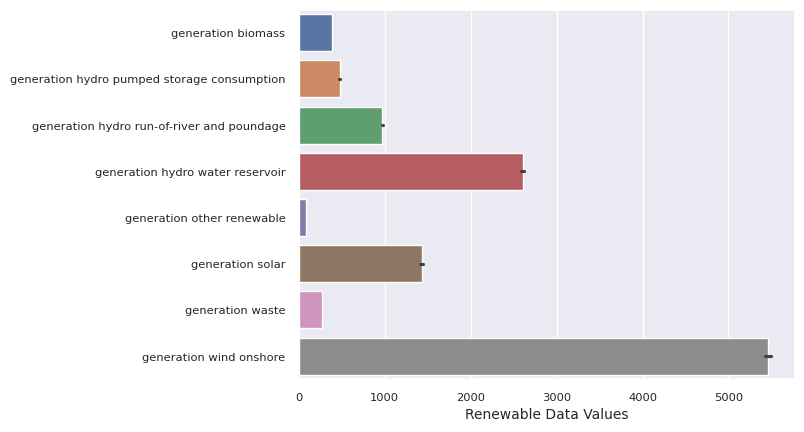

In [ ]:
sns.set(font_scale=0.75)
my_plot = sns.barplot(renewable_dataset, orient="y")
plt.xlabel("Renewable Data Values", fontsize=10)


Text(0.5, 0, 'Non-Renewable Data Values')

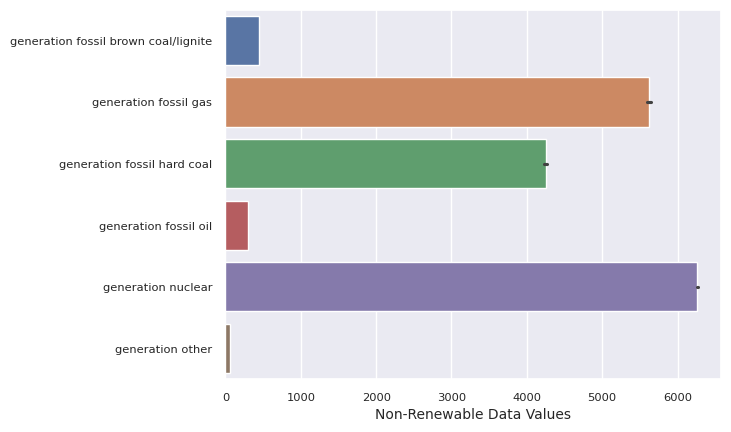

In [ ]:
sns.set(font_scale=0.75)
my_plot = sns.barplot(non_renewable_dataset, orient="y")
plt.xlabel("Non-Renewable Data Values", fontsize=10)

In [ ]:
#@title Correlation matrix




In [ ]:
#@title Linear Regression: Model for Renewable energy vs Total load actual MODEL1

In [ ]:
#Can we accurately predict future electricity generation based on Spain’s historical data and weather forecasts?
X = renewable_dataset
y = newEnergy_Dataset['total load actual']

In [ ]:
from sklearn.model_selection import train_test_split
#splitting the data into 4 different categories
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state = 32)


In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [ ]:
X_train

,const,generation biomass,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation other renewable,generation solar,generation waste,generation wind onshore
3143,1.0,476.0,112.0,750.0,2145.0,71.0,29.0,239.0,2085.0
20128,1.0,206.0,36.0,1066.0,1553.0,95.0,4217.0,312.0,7813.0
35016,1.0,286.0,386.0,1059.0,1203.0,103.0,15.0,313.0,6578.0
4749,1.0,509.0,0.0,633.0,2940.0,72.0,241.0,264.0,2590.0
33706,1.0,294.0,4.0,1729.0,5826.0,113.0,3251.0,224.0,2590.0
...,...,...,...,...,...,...,...,...,...
19527,1.0,251.0,0.0,1182.0,5001.0,97.0,2733.0,284.0,1426.0
24828,1.0,354.0,0.0,343.0,1215.0,86.0,4059.0,303.0,2584.0
20414,1.0,247.0,3833.0,842.0,748.0,81.0,2259.0,288.0,11387.0
9526,1.0,395.0,0.0,638.0,3981.0,76.0,27.0,114.0,7125.0


In [ ]:
#fitting the model
import statsmodels.api as sm
model1= sm.OLS(y_train, X_train).fit()
#Print Model Summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:      total load actual   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     6047.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:21:46   Log-Likelihood:            -2.2885e+05
No. Observations:               24544   AIC:                         4.577e+05
Df Residuals:                   24535   BIC:                         4.578e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
y_pred = model1.predict(X_test)

Text(0.5, 1.0, 'Actual vs Predicted values')

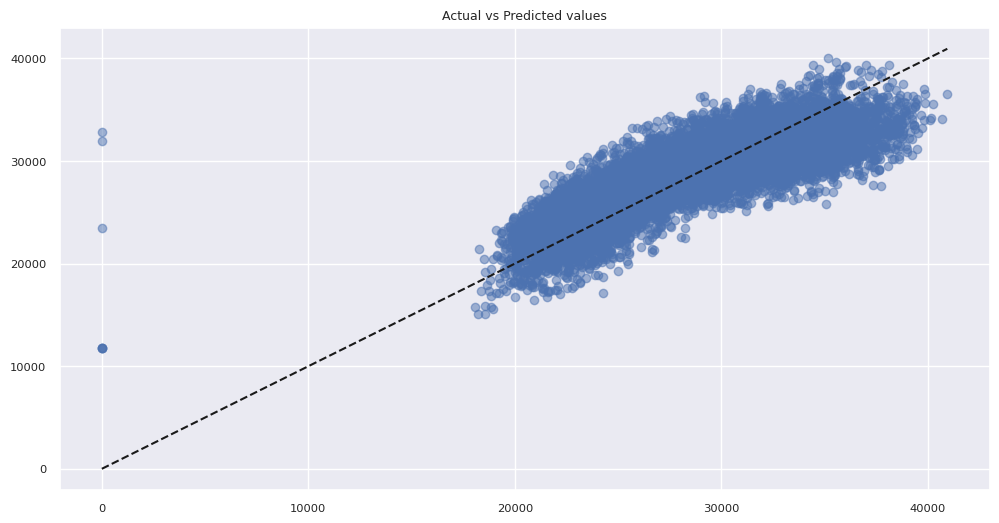

In [ ]:
#Scatter plot of Actual vs Predicted Values

plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.title("Actual vs Predicted values")

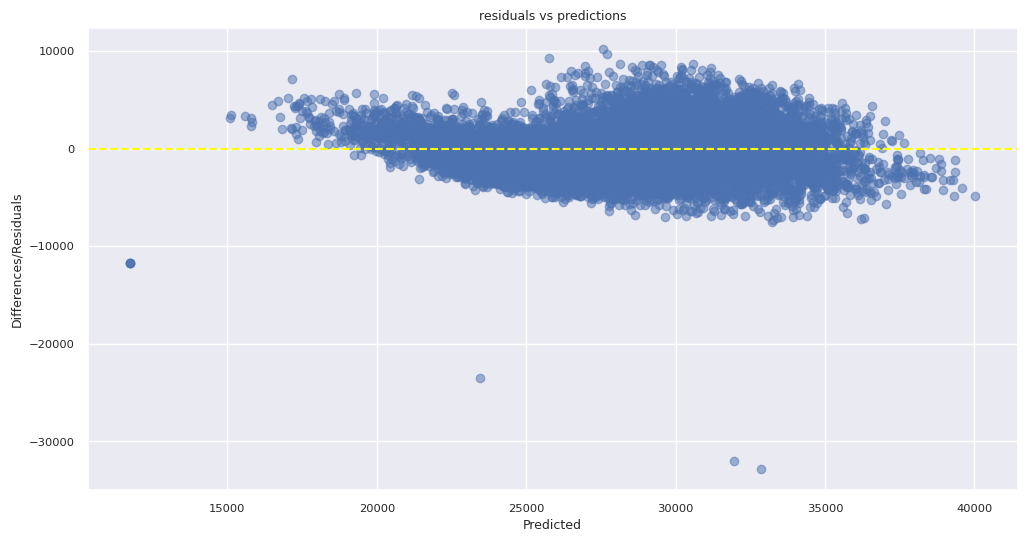

In [ ]:
#plotting the residuals which are basically the differences between the tested data and the predicted data

residuals = y_test - y_pred
plt.figure(figsize = (12,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color = 'yellow', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Differences/Residuals')
plt.title('residuals vs predictions')
plt.show()

In [ ]:
#NOTE
#The variable total load actual was used as the y variable. The reason total load actual was used for the y variable is because total load actual is the electricity demand or electricity consumption of the
#of that given area over a period of time. I am comparing the total load with the renewable and non renewable energy.

In [ ]:
#@title mean squared error for model 1
mean_squared_error = mean_squared_error(y_test, y_pred)
print(f"The mean squared error (MSE): {mean_squared_error}")


The mean squared error (MSE): 6859344.788661416


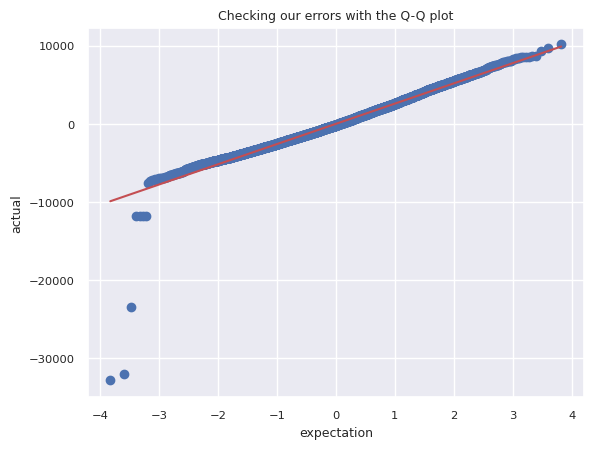

In [ ]:
#checking our errors for model 1
import scipy.stats as stats
stats.probplot(residuals, dist='norm', plot=plt)
plt.title("Checking our errors with the Q-Q plot")
plt.xlabel("expectation")
plt.ylabel("actual")
plt.show()
#since our errors follow a stright line we can assume that the expectation of the predicted model is accurate.
#informal terms Helps us match our errors' pattern with the expected random pattern by lining them up on a graph. If our errors follow a straight line on this graph, it means they're behaving just as we'd expect in a random world.

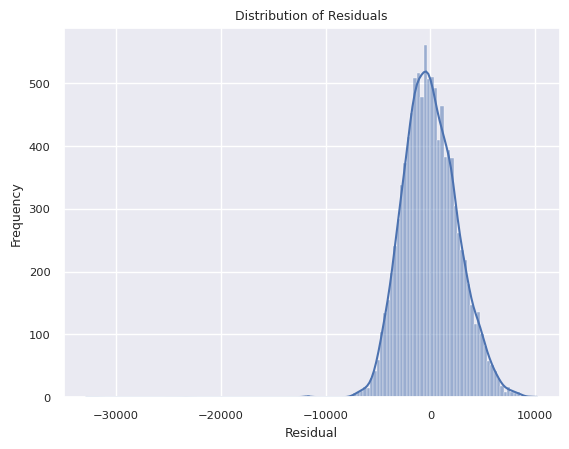

In [ ]:
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

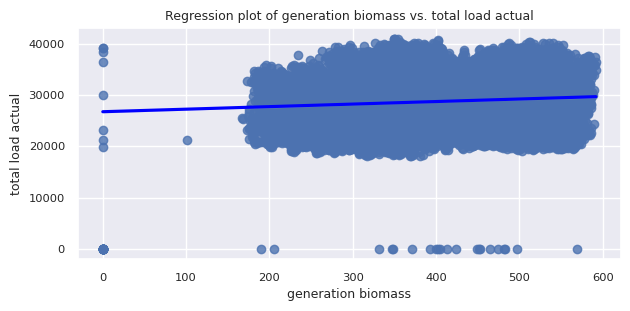

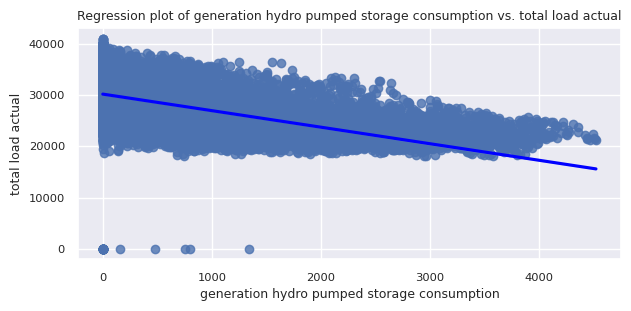

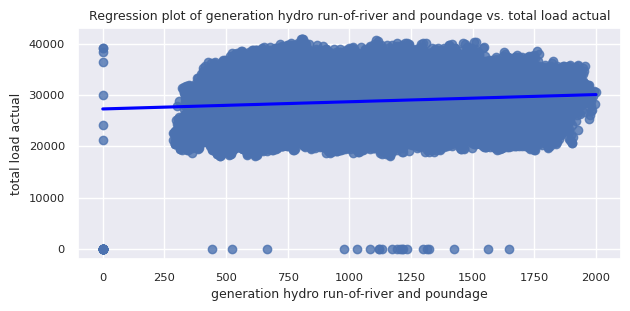

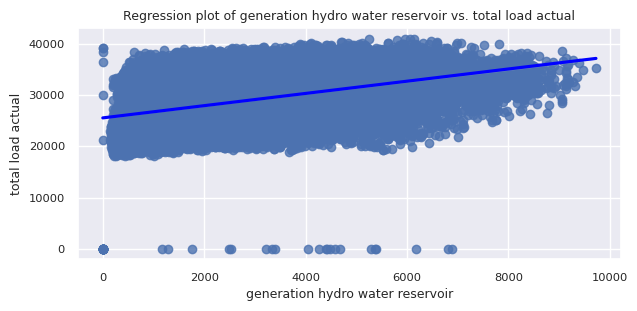

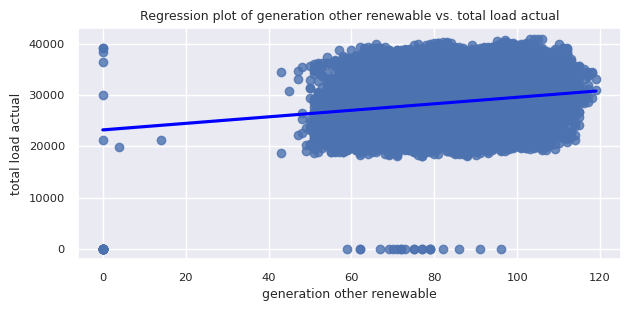

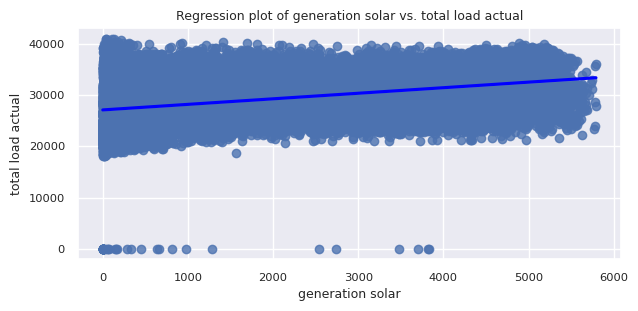

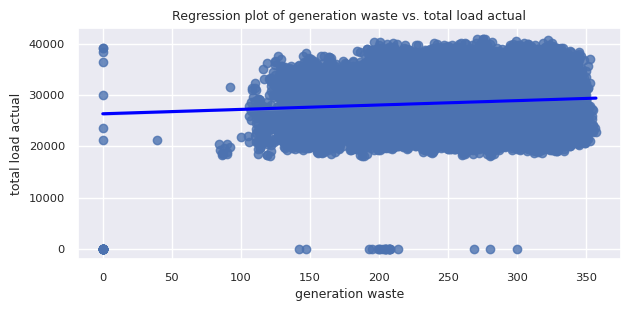

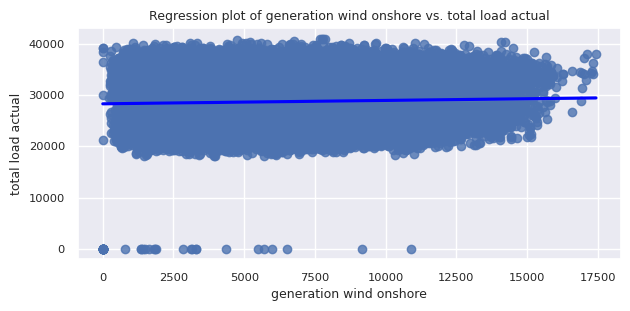

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
for feature in X.columns:
   plt.figure(figsize=(7, 3))
   sns.regplot(x=X[feature], y=y, line_kws ={"color" : "blue"})
   plt.title(f'Regression plot of {feature} vs. total load actual')
   plt.xlabel(f'{feature}')
   plt.ylabel("total load actual")
   plt.show()



In [ ]:
#@title MODEL 2 LINEAR REGRESSION:NON RENEWABLE VS TOTAL LOAD ACTUAL


In [ ]:
X1 = non_renewable_dataset
y1 = newEnergy_Dataset['total load actual']

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=32)

In [ ]:
import statsmodels.api as sm
X1_train = sm.add_constant(X1_train)
X1_test = sm.add_constant(X1_test)


In [ ]:

#fitting the model
import statsmodels.api as sm
model2= sm.OLS(y1_train, X1_train).fit()
#Print Model Summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:      total load actual   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     3119.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:33:02   Log-Likelihood:            -2.3526e+05
No. Observations:               24544   AIC:                         4.705e+05
Df Residuals:                   24537   BIC:                         4.706e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [ ]:
y1_pred = model2.predict(X1_test)

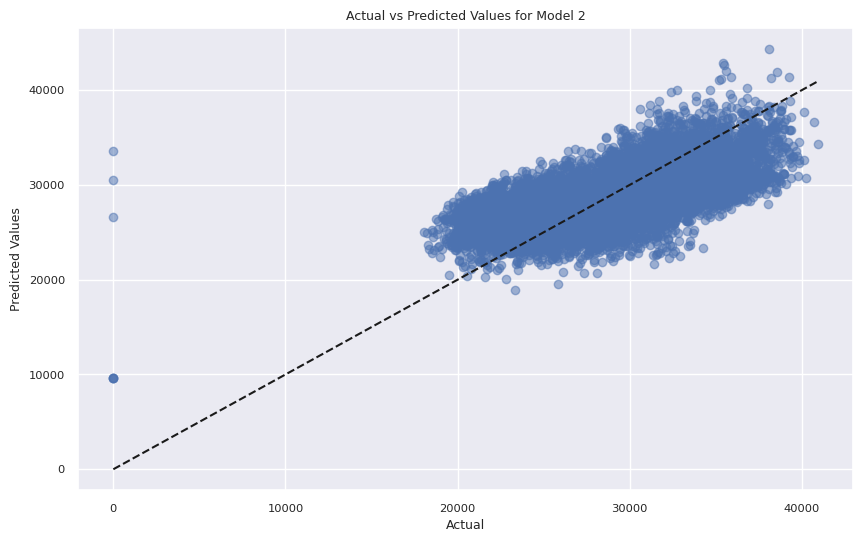

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y1_test, y1_pred, alpha=0.5)
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], '--k')
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for Model 2")
plt.show()

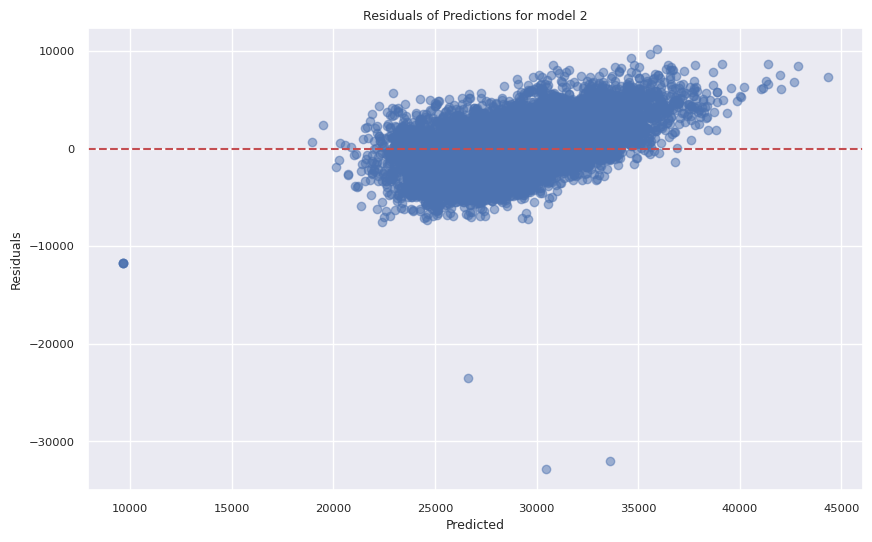

In [ ]:
#plotting the residuals for model 2
residuals1 = y1_test - y1_pred
plt.figure(figsize=(10, 6))
plt.scatter(y1_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Adds a horizontal line at y=0
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions for model 2')
plt.show()


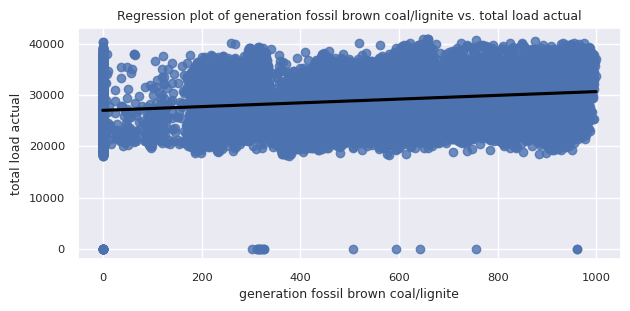

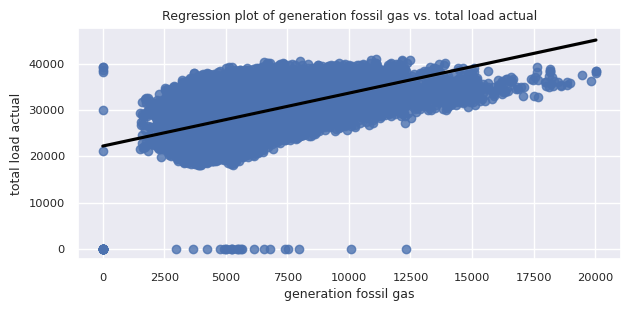

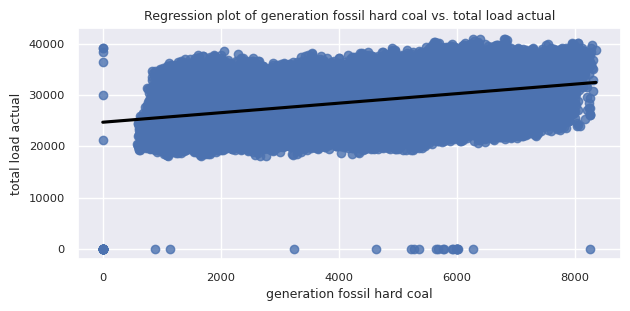

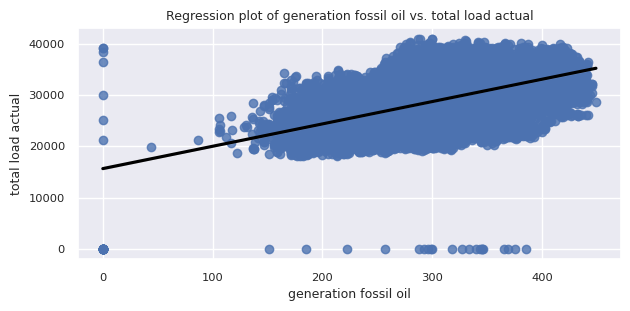

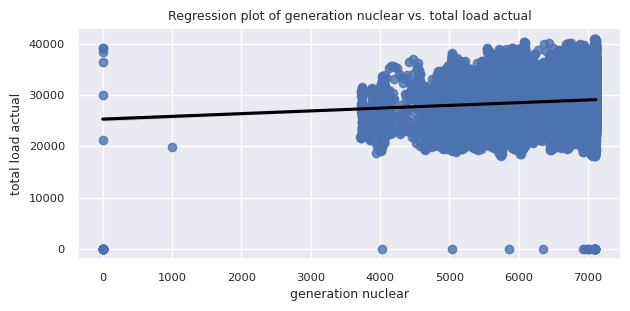

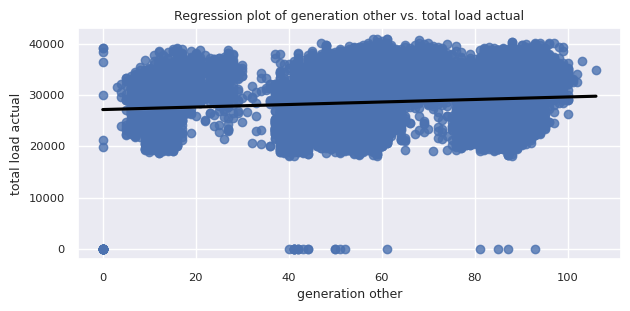

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for feature in X1.columns:
    plt.figure(figsize=(7, 3))
    sns.regplot(x=X1[feature], y=y1, line_kws={"color": "black"})
    plt.title(f'Regression plot of {feature} vs. total load actual')
    plt.xlabel(f'{feature}')
    plt.ylabel('total load actual')
    plt.show()


In [ ]:
#mean squared error for model 2
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y1_test, y1_pred)
print(f"Mean Squared Error: {mse1}")

Mean Squared Error: 12061321.577479778


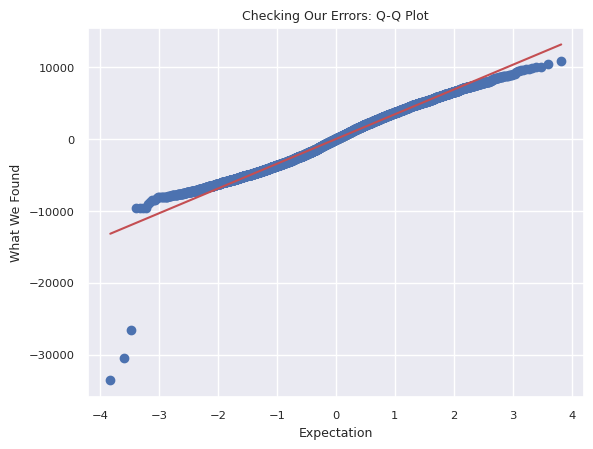

In [ ]:
#@title checking our errors for model 2


import scipy.stats as stats

#Q-Q Plot
stats.probplot(residuals1, dist="norm", plot=plt)
plt.title('Checking Our Errors: Q-Q Plot')
plt.xlabel('Expectation')
plt.ylabel('What We Found')
plt.show()

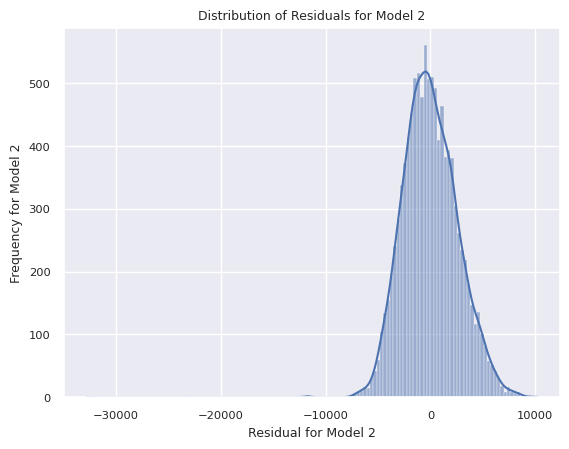

In [ ]:
#plotting of the distributions of residuals for model 2

residuals1 = y1_test - y1_pred
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals for Model 2')
plt.xlabel('Residual for Model 2')
plt.ylabel('Frequency for Model 2')
plt.show()

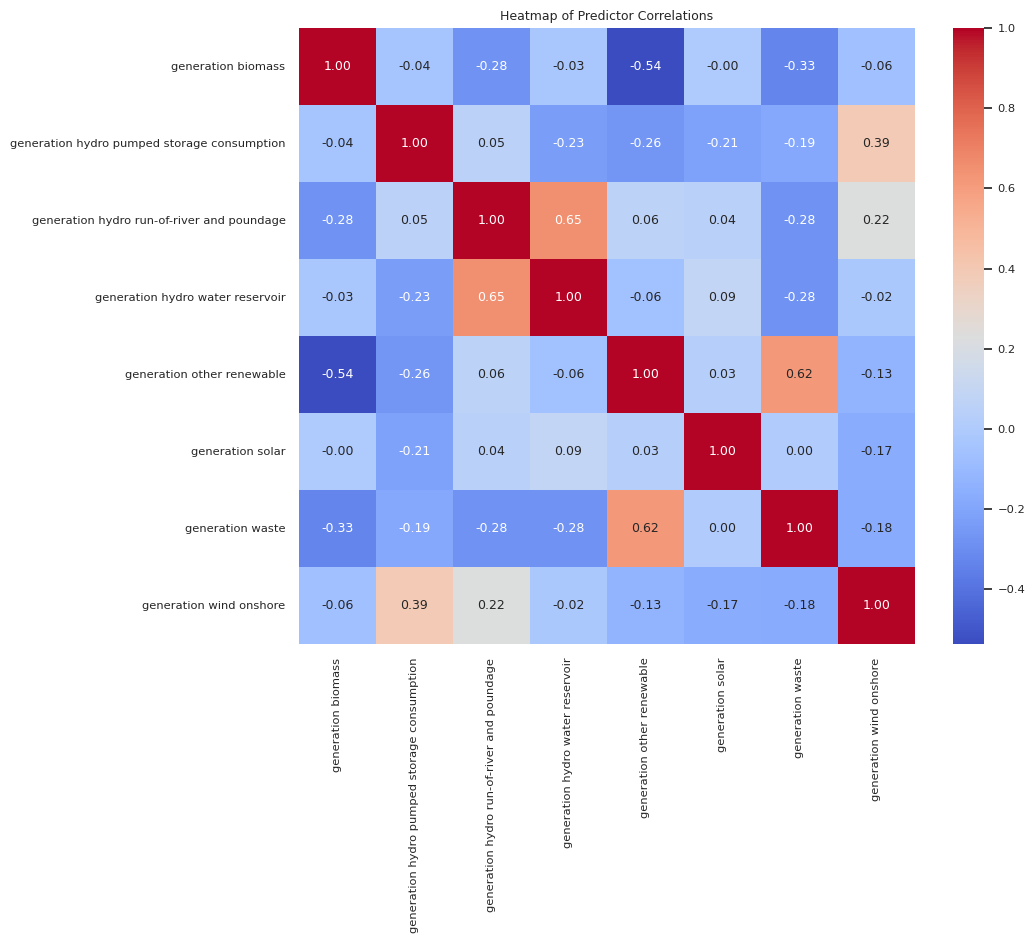

In [ ]:
#@title Correlation Matrix for Model 1

import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = X.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Heatmap of Predictor Correlations')
plt.show()

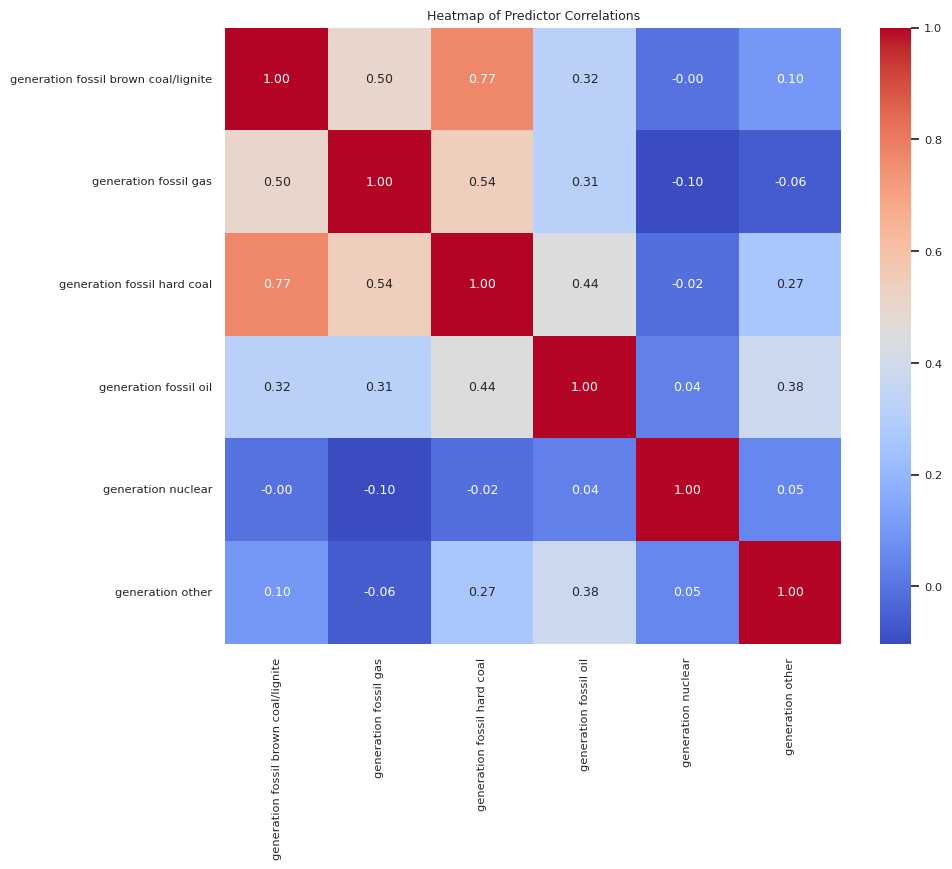

In [ ]:
#@title Model 2 Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr1 = X1.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr1, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Heatmap of Predictor Correlations')
plt.show()